![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Barcode Generation and Reading**

- In this lesson we'll to create barcodes of various standards as well reading what's on them.

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images

!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

     |████████████████████████████████| 217 kB 5.1 MB/s 
     |████████████████████████████████| 43 kB 1.3 MB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40401 sha256=b1b35af6b4ac25193efe227c432457f6a9863af2e97b9f509beb59932c09cb9f
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 

## **Barcodes Generation** 
Let's generate barcodes using our python-barcode package.

Supported Formats
At the time of this writing, this package supports the following formats:
- EAN-8
- EAN-13
- EAN-14
- UPC-A
- JAN
- ISBN-10
- ISBN-13
- ISSN
- Code 39
- Code 128
- PZN


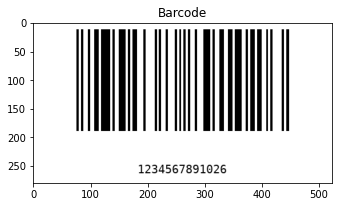

In [2]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
    EAN13('123456789102', writer=ImageWriter()).write(f)

barcode = cv2.imread("barcode.png")
imshow("Barcode", barcode)

## **QR Code Generation** 
Let's generate QR Codes using our qrcode package.

A QR code (abbreviated from Quick Response code) is a type of matrix barcode (or two-dimensional barcode) first designed in 1994 for the automotive industry in Japan. A barcode is a machine-readable optical label that contains information about the item to which it is attached. In practice, QR codes often contain data for a locator, identifier, or tracker that points to a website or application. A QR code uses four standardized encoding modes (numeric, alphanumeric, byte/binary, and kanji) to store data efficiently; extensions may also be used.

A QR code consists of black squares arranged in a square grid on a white background, which can be read by an imaging device such as a camera, and processed using Reed–Solomon error correction until the image can be appropriately interpreted. The required data is then extracted from patterns that are present in both horizontal and vertical components of the image.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/QR_Code_Structure_Example_3.svg/800px-QR_Code_Structure_Example_3.svg.png)

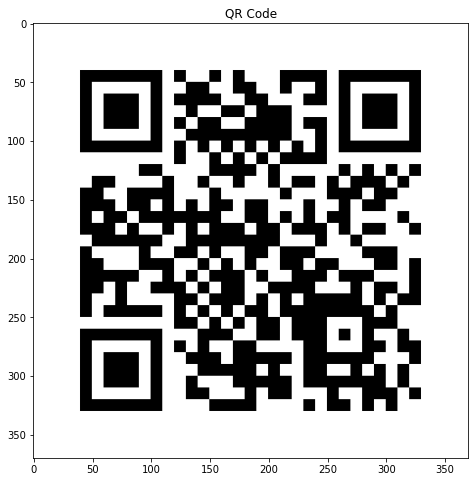

In [3]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("https://wwww.opencv.org")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

qrcode = cv2.imread("qrcode.png")
imshow("QR Code", qrcode, size = 8)

**Configuartion for QR Codes**:

- version — Control the size of the QR Code. It accepts an integer from 1 to 40. Version 1 consists of 21 x 21 matrix.
- error_correction — Control the error correction used for the QR Code.
- box_size — Control the number of pixels of each boxes of the QR code.
- border — Control the boxes thickness of the border. The default is value is 4 which is also the minimum value according to the specification.

There are 4 constants available for error_correction. The higher errors can be corrected, the better it is.

- ERROR_CORRECT_L — About 7% or less errors can be corrected.
- ERROR_CORRECT_M — About 15% or less errors can be corrected. This is the default value.
- ERROR_CORRECT_Q — About 25% or less errors can be corrected.
- ERROR_CORRECT_H — About 30% or less errors can be corrected.

## **Decoding QR Codes**

In [4]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('qrcode.png')
result = decode(img)
for i in result:
    print(i.data.decode("utf-8"))

https://wwww.opencv.org


In [5]:
!wget https://i.stack.imgur.com/1DwED.jpg

--2021-11-20 20:09:10--  https://i.stack.imgur.com/1DwED.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.184.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.184.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439449 (429K) [image/jpeg]
Saving to: ‘1DwED.jpg’

1DwED.jpg           100%[===================>] 429.15K  --.-KB/s    in 0.03s   

2021-11-20 20:09:10 (12.3 MB/s) - ‘1DwED.jpg’ saved [439449/439449]



### **Detecting QR Codes**

[Point(x=558, y=938), Point(x=588, y=1288), Point(x=917, y=1276), Point(x=875, y=896)]
QR Code revealed: http://ruthenus.pl (QRCODE)


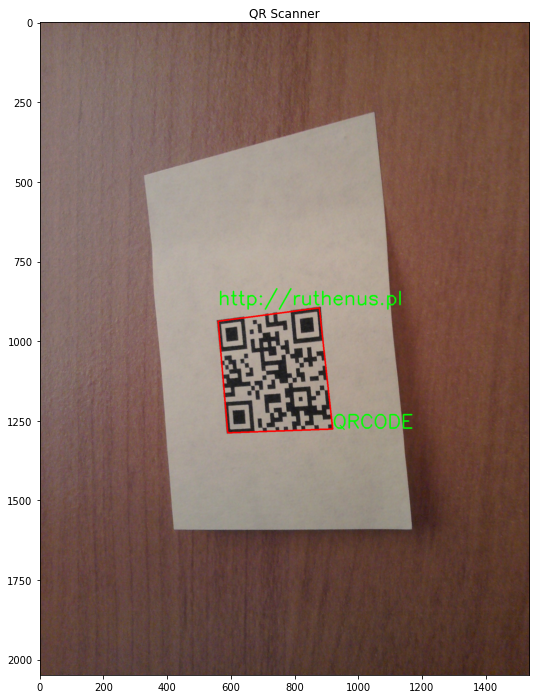

In [7]:
from pyzbar.pyzbar import decode

image = cv2.imread("1DwED.jpg")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  # Draw a bounding box over our detected QR code
  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our 
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("QR Code revealed: {}".format(text))

# display our output
imshow("QR Scanner", image, size = 12)

In [8]:
!wget https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg

--2021-11-20 20:11:14--  https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg
Resolving www.differencebetween.com (www.differencebetween.com)... 172.67.217.144, 104.21.75.79, 2606:4700:3036::6815:4b4f, ...
Connecting to www.differencebetween.com (www.differencebetween.com)|172.67.217.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79365 (78K) [image/jpeg]
Saving to: ‘1024px-ISBN.jpg’

1024px-ISBN.jpg     100%[===================>]  77.50K  --.-KB/s    in 0.01s   

2021-11-20 20:11:15 (7.14 MB/s) - ‘1024px-ISBN.jpg’ saved [79365/79365]



Barcode revealed: 9780863815805
Barcode revealed: 9780863815805


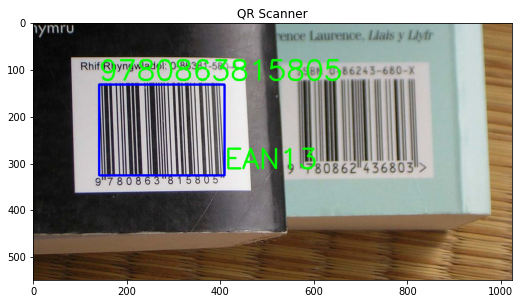

In [10]:
from pyzbar.pyzbar import decode

image = cv2.imread("1024px-ISBN.jpg")

# Detect and decode the qrcode
barcodes = decode(image)

# loop over the detected barcodes
for bc in barcodes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our 
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("Barcode revealed: {}".format(barcode_text))
  print("Barcode revealed: {}".format(barcode_text))

# display our output
imshow("QR Scanner", image, size = 16)